In [1]:
ls ../data/model-predictions

test.csv  trial.csv


In [87]:
import __init__
from models import utils
from ast import literal_eval
from metrics import f1_score

dev = utils.load_df("../data/model-predictions/trial.csv")
test = utils.load_df("../data/model-predictions/test.csv")


models = [model for model in dev.columns 
          if '_1_' not in model 
              and 'random' not in model 
              and 'text' not in model
              and 'spans' not in model]

def make_spans(df, col):
    df[col] = df[col].apply(literal_eval)
    return df[col]

for model in models:
    dev[model] = dev[model].apply(literal_eval)
    test[model] = test[model].apply(literal_eval)

dev_gold = dev['spans'].apply(literal_eval)
test_gold = test['spans'].apply(literal_eval)

In [88]:
dev_gold[0]

[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]

glove_bigru_2_layer F1 = 0.60 ± 0.02


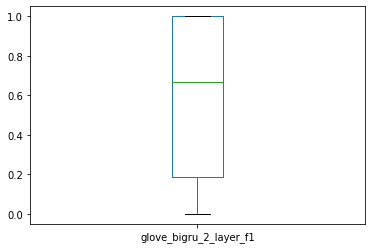

In [94]:
from scipy.stats import sem

for model in models[2:]:
    gold = dev_gold
    predictions = dev[model].tolist()
    f1_scores = [f1_score(gold[i], predictions[i]) for i in range(len(gold))]
    dev[model+"_f1"] = f1_scores
    #_ = dev[model+'_f1'].plot(kind="box")
    print (model, f"F1 = {dev[model+'_f1'].mean():.2f} ± {sem(dev[model+'_f1']):.2f}",)
    


glove_bilstm_2_layer F1 = 0.63 ± 0.01


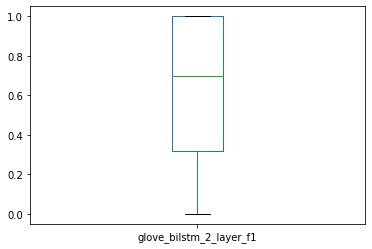

In [92]:
from scipy.stats import sem

for model in models:
    gold = test_gold
    predictions = test[model].tolist()
    f1_scores = [f1_score(gold[i], predictions[i]) for i in range(len(gold))]
    test[model+"_f1"] = f1_scores
    _ = dev[model+'_f1'].plot(kind="box")
    print (model, f"F1 = {test[model+'_f1'].mean():.2f} ± {sem(test[model+'_f1']):.2f}")
    break
